# MOVING pass band of Digital filter

Following document is a part of articler on Medium and present how to control the position of notch filter (frequency domain) by hand (camera detection and tracking).

### NOTE. There are some handy cells which help to understand the conctpt. you can go directelly to section: MOVING NOTCH FILTER

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import math
import control
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

In [3]:
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [4]:
#not project relevatnt - only for testing
def f(x):
    print(x)
    return x

In [5]:
interact(f, x=widgets.IntSlider(min=1, max=100, step=1, value=10));

interactive(children=(IntSlider(value=10, description='x', min=1), Output()), _dom_classes=('widget-interact',…

In [6]:
#not project relevatnt - only for testing
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [7]:
%matplotlib inline
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [8]:
def ff(freq):
    wn = freq
    zeta = 0.05
    a = 2 # pole a time lower and higher than natural frequency
    num = [wn*wn]
    den = [1, 2*zeta*wn, wn*wn]
    sys = control.tf(den, num)

    num_pole_above = [a*wn]
    den_pole_above = [1, a*wn]
    pole_above = control.tf(num_pole_above, den_pole_above)

    num_pole_below = [wn/a]
    den_pole_below = [1, wn/a]
    pole_below = control.tf(num_pole_below, den_pole_below)

    notch = sys * pole_above * pole_below 
    #notchPlot(notch)
    plt.figure(figsize=(12,8))
    #mag, phase, omega = control.bode_plot(notch, Hz=False)


In [9]:
def fff(freq):
    samplingFreq = 1000; # sampled at 1 kHz = 1000 samples / second
    tlims = [0,1]        # in seconds
    signalFreq = [2,50]; # Cycles / second
    signalMag = [1,0.2]; # magnitude of each sine
    w0 = 2*np.pi*freq; # pole frequency (rad/s)
    n = 2; # Filter order
    
    # Low-pass filter
    num = w0        # transfer function numerator coefficients
    den = [1,w0]    # transfer function denominator coefficients
    lowPass = signal.TransferFunction(num,den) # Transfer function
    

    # Generate the bode plot
    w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
    #w = np.logspace( 1, 10000, 500 )
    #w = np.logspace(10, 10000, 500)
    w, mag, phase = signal.bode(lowPass,w)

    # Magnitude plot
    plt.figure()
    plt.semilogx(w, mag)
    for sf in signalFreq:
        plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
    plt.ylabel("Amplitude")
    #plt.xlim([min(w),max(w)])
    #plt.ylim([min(mag),max(mag)])

    # Phase plot
    plt.figure()
    plt.semilogx(w, phase)  # Bode phase plot
    plt.ylabel("Phase")
    plt.xlabel("freq (rad/s)")
    #plt.xlim([min(w),max(w)])
    
    plt.show()

In [10]:
def movingLowPass(freq):
    
    w0 = 2*np.pi*freq; # pole frequency (rad/s)
    
    # Low-pass filter
    num = [w0]        # transfer function numerator coefficients
    den = [1,w0]    # transfer function denominator coefficients
    sys = signal.TransferFunction(num, den)
    w, mag, phase = signal.bode(sys)
    
    
    plt.figure(figsize=(12,4))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, mag)    # Bode magnitude plot
    
    plt.figure(figsize=(12,4))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, phase)  # Bode phase plot
    plt.show()

In [11]:
interactive_plot = interactive(movingLowPass, freq=(1, 1000, 10))
output = interactive_plot.children[-1]
output.layout.height = '650px'
interactive_plot

interactive(children=(IntSlider(value=491, description='freq', max=1000, min=1, step=10), Output(layout=Layout…

## NOTCH AS A  PASSBAND

In [12]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import math
import control

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
wn =50* 2*np.pi
zeta = 0.05
a = 2 # pole a time lower and higher than natural frequency
num = [wn*wn]
den = [1, 2*zeta*wn, wn*wn]
sys = control.tf(den, num)

num_pole_above = [a*wn]
den_pole_above = [1, a*wn]
pole_above = control.tf(num_pole_above, den_pole_above)

num_pole_below = [wn/a]
den_pole_below = [1, wn/a]
pole_below = control.tf(num_pole_below, den_pole_below)

sys_notch = sys * pole_above * pole_below 

#print(sys_notch)
#print(sys_notch * pole_above)
#print(sys_notch * pole_above * pole_below)

print(sys_notch)


9.87e+04 s^2 + 3.101e+06 s + 9.741e+09
--------------------------------------
9.87e+04 s^2 + 7.752e+07 s + 9.741e+09



In [15]:
samplingFreq = 1000; # sampled at 1 kHz = 1000 samples / second

In [16]:
b = sys_notch.num;
a = sys_notch.den;

a2 = a[0][0][0]
a1 = a[0][0][1]
a0 = a[0][0][2]
b2 = b[0][0][0]
b1 = b[0][0][1]
b0 = b[0][0][2]

print("a2: ", a2)
print("a1: ", a1)
print("a0: ", a0)
print("b2: ", b2)
print("b1: ", b1)
print("b0: ", b0)



a2:  98696.04401089359
a1:  77515691.70074956
a0:  9740909103.400244
b2:  98696.04401089359
b1:  3100627.6680299826
b0:  9740909103.400244


In [17]:
dt = 1.0/samplingFreq;
denNotch = [a2, a1, a0]
numNotch = [b2, b1, b0]
sysNotch = signal.TransferFunction(numNotch, denNotch)

In [18]:
discreteNotch = sysNotch.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteNotch)

TransferFunctionDiscrete(
array([ 0.73402125, -1.37624454,  0.71185636]),
array([ 1.        , -1.37624454,  0.44587761]),
dt: 0.001
)


In [19]:
#notchFilter = signal.TransferFunction(numNotch, denNotch)

In [20]:
def movingNotchDEV(freq):
    
    w0 = 2*np.pi*freq; # pole frequency (rad/s)

    notchFilter = signal.TransferFunction(numNotch, denNotch)
    w, mag, phase = signal.bode(notchFilter)
    
    
    plt.figure(figsize=(12,4))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, mag)    # Bode magnitude plot
    
    plt.figure(figsize=(12,4))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, phase)  # Bode phase plot
    plt.show()

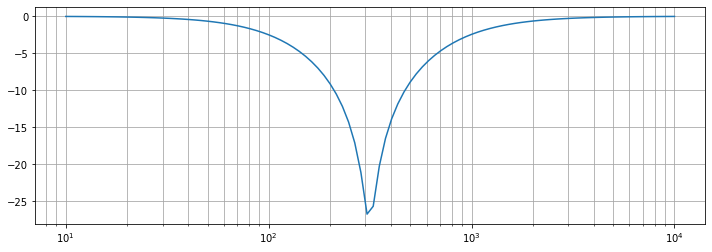

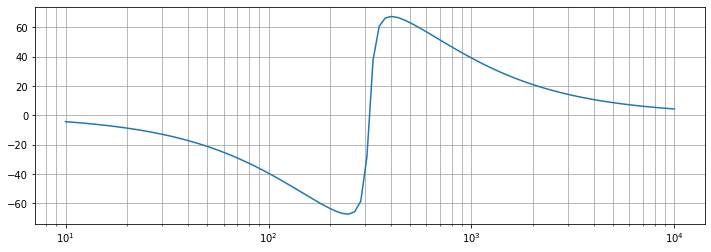

In [21]:
movingNotchDEV(50)

In [22]:
def movingNotch(freq):
    
    ####
    wn = freq* 2*np.pi #pole frequency (rad/s)
    zeta = 0.05
    a = 2 # pole a time lower and higher than natural frequency
    num = [wn*wn]
    den = [1, 2*zeta*wn, wn*wn]
    sys = control.tf(den, num)

    num_pole_above = [a*wn]
    den_pole_above = [1, a*wn]
    pole_above = control.tf(num_pole_above, den_pole_above)

    num_pole_below = [wn/a]
    den_pole_below = [1, wn/a]
    pole_below = control.tf(num_pole_below, den_pole_below)

    sys_notch = sys * pole_above * pole_below 
    print(sys_notch)
    ####
    samplingFreq = 1000;
    ####
    b = sys_notch.num;
    a = sys_notch.den;

    a2 = a[0][0][0]
    a1 = a[0][0][1]
    a0 = a[0][0][2]
    b2 = b[0][0][0]
    b1 = b[0][0][1]
    b0 = b[0][0][2]
    ####
    dt = 1.0/samplingFreq;
    denNotch = [a2, a1, a0]
    numNotch = [b2, b1, b0]
    sysNotch = signal.TransferFunction(numNotch, denNotch)
    ####
    discreteNotch = sysNotch.to_discrete(dt,method='gbt',alpha=0.5)
    print(discreteNotch)
    bb = discreteNotch.num
    aa = -discreteNotch.den
    print("---Filter coefficicients: ")
    print("b :", bb)
    print("a: ", aa[1:])

    notchFilter = signal.TransferFunction(numNotch, denNotch)
    w, mag, phase = signal.bode(notchFilter)
    
    #clear_output(wait=True)
    plt.figure(figsize=(12,4))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, mag)    # Bode magnitude plot
    
    plt.figure(figsize=(12,4))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, phase)  # Bode phase plot
    plt.show()

In [23]:
#movingNotch(50)
interactive_plot = interactive(movingNotch, freq=(1, 10000, 100))
output = interactive_plot.children[-1]
output.layout.height = '750px'
interactive_plot

interactive(children=(IntSlider(value=4901, description='freq', max=10000, min=1, step=100), Output(layout=Lay…

In [24]:
#movingNotch(50)
#time.sleep(3)
#movingNotch(500)
#time.sleep(3)
#movingNotch(5000)
#time.sleep(3)
#movingNotch(2000)
#time.sleep(3)
#movingNotch(50)
#time.sleep(3)
#movingNotch(1000)

# MOVING NOTCH FILTER

In [25]:
#!git clone https://github.com/AllenDowney/ThinkDSP.git 

In [26]:
import sys
import time
#sys.path.insert(0, 'ThinkDSP/code/') 
#import thinkdsp
import matplotlib.pyplot as pyplot
import IPython

from scipy import signal
import matplotlib.pyplot as plt
import math
import control
import numpy as np


In [27]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

In [28]:
yfiltAudio = []

In [29]:
def movingNotchDev(freq):
    
    ####
    wn = freq* 2*np.pi #pole frequency (rad/s)
    zeta = 0.001
    a = 2 # pole a time lower and higher than natural frequency
    num = [wn*wn]
    den = [1, 2*zeta*wn, wn*wn]
    sys = control.tf(den, num)

    num_pole_above = [a*wn]
    den_pole_above = [1, a*wn]
    pole_above = control.tf(num_pole_above, den_pole_above)

    num_pole_below = [wn/a]
    den_pole_below = [1, wn/a]
    pole_below = control.tf(num_pole_below, den_pole_below)

    sys_notch = sys * pole_above * pole_below 
    print(sys_notch)
    ####
    samplingFreq = 1000;
    ####
    b = sys_notch.num;
    a = sys_notch.den;

    a2 = a[0][0][0]
    a1 = a[0][0][1]
    a0 = a[0][0][2]
    b2 = b[0][0][0]
    b1 = b[0][0][1]
    b0 = b[0][0][2]
    ####
    dt = 1.0/samplingFreq;
    denNotch = [a2, a1, a0]
    numNotch = [b2, b1, b0]
    sysNotch = signal.TransferFunction(numNotch, denNotch)
    ####
    discreteNotch = sysNotch.to_discrete(dt,method='gbt',alpha=0.5)
    print(discreteNotch)
    bb = discreteNotch.num
    aa = -discreteNotch.den
    print("---Filter coefficicients: ")
    print("b :", bb)
    print("a: ", aa[1:])

    notchFilter = signal.TransferFunction(numNotch, denNotch)
    w, mag, phase = signal.bode(notchFilter)
    
    #clear_output(wait=True)
    plt.figure(figsize=(12,3))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, mag)    # Bode magnitude plot
    

    samplingFreq = 1000;    
 
    A1 = 1
    A2 = 0.8
    A3 = 0.8
    A4 = 0.8
    f1 = 50
    f2 = 150
    f3 = 300
    f4 = 450

    t = np.linspace(0,1,1000)
    y = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t) + A4*np.sin(2*np.pi*f4*t)

    # Compute Fourier transform
    yhat = np.fft.fft(y)
    fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)
    

    
    # Filter the signal
    yfilt = np.zeros(len(y));
    for i in range(4,len(y)):
        yfilt[i] = aa[1]*yfilt[i-1] + aa[2]*yfilt[i-2] + bb[0]*y[i] + bb[1]*y[i-1] + bb[2]*y[i-2];
        yfiltAudio.append(yfilt[i])

    # Plot the signal
    plt.figure(figsize=(12,3))
    plt.plot(t,y)
    plt.plot(t,yfilt)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.legend(['sig in', 'filtered'])
    
    # Fourier transform
    yfilthat = np.fft.fft(yfilt)
    fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

    plt.figure(figsize=(12,3))

    plt.plot(fcycles,np.absolute(yfilthat))
    plt.xlim([0,500]);

    #plt.plot(fcycles,np.absolute(yhat))
    #plt.xlim([0,500]);
    plt.xlabel("frequency")
    plt.ylabel("amplitude")
    #plt.legend(['sig in', 'filtered'])
    
    plt.show()
    
    print(yfilt[0:10])


In [30]:
interactive_plot = interactive(movingNotchDev, freq=(1, 500, 10))
output = interactive_plot.children[-1]
output.layout.height = '1000px'
interactive_plot

interactive(children=(IntSlider(value=241, description='freq', max=500, min=1, step=10), Output(layout=Layout(…

In [31]:
print(yfiltAudio[0:10])

[0.102121204358433, 0.9153014878619585, -0.2623932496372753, 1.7229552863936302, -0.010034657633382293, 1.030669906664827, 0.73393195504697, 0.2884357345088865, -0.39266984867415766, -0.8939719447139802]


# CHECK FILTER ON AUDIO. GENERATE SIGNAL AND REMOVE FREQUENCY

In [32]:
#sudo apt-get install -y libasound2-dev
#sudo pip3 install simpleaudio
#https://simpleaudio.readthedocs.io/en/latest/capabilities.html
import numpy as np
import simpleaudio as sa

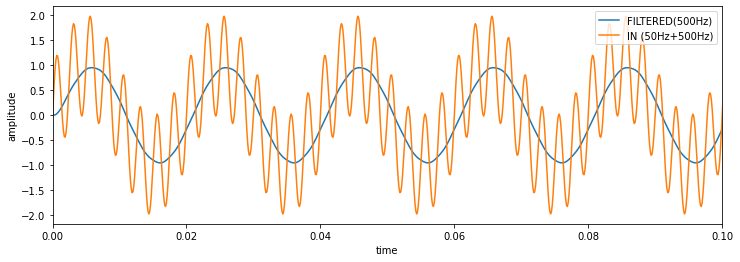

In [33]:
fs = 11025  # 44100 samples per second
fs = 8000
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)
A1 = 1
A2 = 0.8
A3 = 0.8
A4 = 1.0
f1 = 50
f2 = 150
f3 = 300
f4 = 400


# filter 50Hz
bb = [ 0.72316045, -1.37624454,  0.72271716]
aa =  [1, 1.37624454, -0.44587761]



# Generate a 440 Hz sine wave
sig1 = A1*np.sin(f1 * t * 2 * np.pi)
sig2 = A2*np.sin(f2 * t * 2 * np.pi)
sig3 = A3*np.sin(f3 * t * 2 * np.pi)
sig4 = A4*np.sin(f4 * t * 2 * np.pi)

sig = sig1 + sig4


yfilt = np.zeros(len(sig));
for i in range(3,len(sig)):
    yfilt[i] =  aa[1]*yfilt[i-1] + aa[2]*yfilt[i-2] + bb[0]*sig[i] + bb[1]*sig[i-1] + bb[2]*sig[i-2];


audio = yfilt * (2**15 - 1) / np.max(np.abs(yfilt))
audioIN = sig * (2**15 - 1) / np.max(np.abs(sig))

# Convert to 16-bit data
audio = audio.astype(np.int16)
audioIN = audioIN.astype(np.int16)

# Start playback
play_objIN = sa.play_buffer(audioIN, 1, 2, fs)
# Wait for playback to finish before exiting
play_objIN.wait_done()

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)
# Wait for playback to finish before exiting
play_obj.wait_done()


plt.figure(figsize=(12,4))
plt.plot(t, yfilt)
plt.plot(t, sig)
plt.xlim([0,0.1])
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend(['FILTERED(500Hz)','IN (50Hz+500Hz)'])
plt.show()


# CONTROL FILTER BY FINGER - CAMERA

In [34]:
def movingNotchDevCamera(freq):
    
    ####
    wn = freq* 2*np.pi #pole frequency (rad/s)
    zeta = 0.001
    a = 2 # pole a time lower and higher than natural frequency
    num = [wn*wn]
    den = [1, 2*zeta*wn, wn*wn]
    sys = control.tf(den, num)

    num_pole_above = [a*wn]
    den_pole_above = [1, a*wn]
    pole_above = control.tf(num_pole_above, den_pole_above)

    num_pole_below = [wn/a]
    den_pole_below = [1, wn/a]
    pole_below = control.tf(num_pole_below, den_pole_below)

    sys_notch = sys * pole_above * pole_below 
    print(sys_notch)
    ####
    samplingFreq = 1000;
    ####
    b = sys_notch.num;
    a = sys_notch.den;

    a2 = a[0][0][0]
    a1 = a[0][0][1]
    a0 = a[0][0][2]
    b2 = b[0][0][0]
    b1 = b[0][0][1]
    b0 = b[0][0][2]
    ####
    dt = 1.0/samplingFreq;
    denNotch = [a2, a1, a0]
    numNotch = [b2, b1, b0]
    sysNotch = signal.TransferFunction(numNotch, denNotch)
    ####
    discreteNotch = sysNotch.to_discrete(dt,method='gbt',alpha=0.5)
    print(discreteNotch)
    bb = discreteNotch.num
    aa = -discreteNotch.den
    print("---Filter coefficicients: ")
    print("b :", bb)
    print("a: ", aa[1:])

    notchFilter = signal.TransferFunction(numNotch, denNotch)
    w, mag, phase = signal.bode(notchFilter)
    
    #clear_output(wait=True)
    plt.figure(figsize=(12,3))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, mag)    # Bode magnitude plot
    
    """
    plt.figure(figsize=(12,3))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.semilogx(w, phase)  # Bode phase plot
    #plt.show()
    """
    samplingFreq = 1000;    
 
    A1 = 1
    A2 = 0.8
    A3 = 0.8
    A4 = 0.8
    f1 = 50
    f2 = 150
    f3 = 300
    f4 = 450

    t = np.linspace(0,1,1000)
    y = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t) + A4*np.sin(2*np.pi*f4*t)

    # Compute Fourier transform
    yhat = np.fft.fft(y)
    fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)
    
    """
    plt.figure(figsize=(12,3))

    plt.plot(t,y)
    plt.ylabel("amplitude")
    plt.xlabel("time")
    #plt.show()
    """
    """
    # Signal spectrum
    plt.figure(figsize=(12,3))
    plt.grid(True, which="both", ls="-", color='0.65')
    plt.plot(fcycles,np.absolute(yhat))
    plt.xlim([0,600])
    plt.ylabel("amplitude");
    plt.xlabel("frequency");
    """
    
    # Filter the signal
    yfilt = np.zeros(len(y));
    for i in range(4,len(y)):
        yfilt[i] = aa[1]*yfilt[i-1] + aa[2]*yfilt[i-2] + bb[0]*y[i] + bb[1]*y[i-1] + bb[2]*y[i-2];
        yfiltAudio.append(yfilt[i])

    # Plot the signal
    plt.figure(figsize=(12,3))
    plt.plot(t,y)
    plt.plot(t,yfilt)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.legend(['sig in', 'filtered'])
    
    # Fourier transform
    yfilthat = np.fft.fft(yfilt)
    fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

    plt.figure(figsize=(12,3))

    plt.plot(fcycles,np.absolute(yfilthat))
    plt.xlim([0,500]);

    #plt.plot(fcycles,np.absolute(yhat))
    #plt.xlim([0,500]);
    plt.xlabel("frequency")
    plt.ylabel("amplitude")
    #plt.legend(['sig in', 'filtered'])
    
    plt.show()
    
    print(yfilt[0:10])



9.87e+06 s^2 + 6.201e+07 s + 9.741e+13
--------------------------------------
9.87e+06 s^2 + 7.752e+10 s + 9.741e+13

TransferFunctionDiscrete(
array([0.46934795, 0.39689568, 0.46849823]),
array([ 1.        ,  0.39689568, -0.06215382]),
dt: 0.001
)
---Filter coefficicients: 
b : [0.46934795 0.39689568 0.46849823]
a:  [-0.39689568  0.06215382]


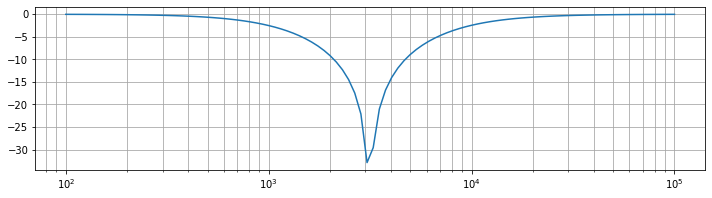

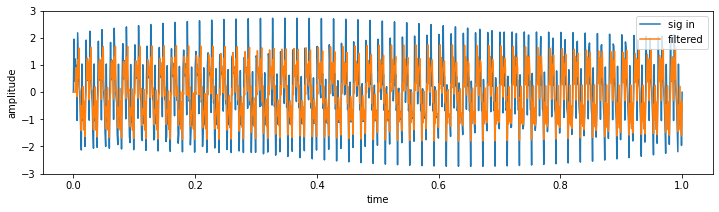

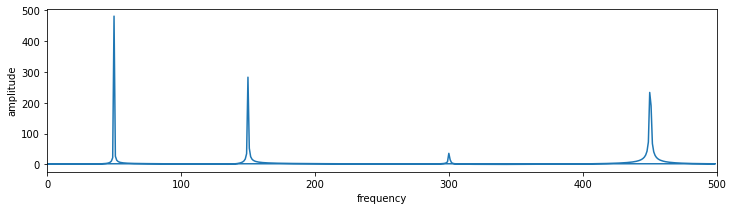

[ 0.          0.          0.          0.          0.90742642  0.87435298
 -0.15791146  1.19982755  0.5198789   1.63387797]


In [35]:
movingNotchDevCamera(500)

In [36]:
import cv2
import mediapipe as mp
import time
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
from IPython.display import clear_output, display

In [37]:
# https://google.github.io/mediapipe/solutions/hands#python-solution-api
#https://google.github.io/mediapipe/solutions/hands#resources

385.27355194091797 369.90906715393066

5.852e+06 s^2 + 2.831e+07 s + 3.424e+13
---------------------------------------
5.852e+06 s^2 + 3.539e+10 s + 3.424e+13

TransferFunctionDiscrete(
array([0.44932999, 0.16874321, 0.44844822]),
array([ 1.        ,  0.16874321, -0.10222179]),
dt: 0.001
)
---Filter coefficicients: 
b : [0.44932999 0.16874321 0.44844822]
a:  [-0.16874321  0.10222179]


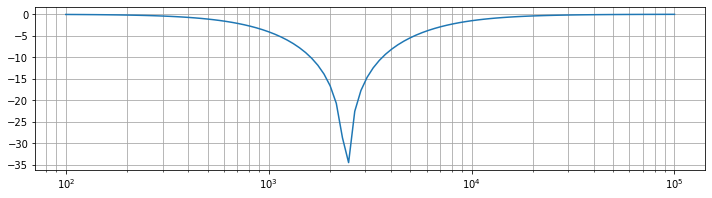

In [ ]:
# For webcam input:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
            continue

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
        image.flags.writeable = False
        results = hands.process(image)
        IMAGE_HEIGHT, IMAGE_WIDTH, _ = image.shape

    # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:

                finger_X = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * IMAGE_WIDTH
                finger_Y = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * IMAGE_HEIGHT
                movingNotchDevCamera(int(finger_X))
            
                clear_output(wait=True)
                print(finger_X, finger_Y)

                mp_drawing.draw_landmarks(
                    image,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
        cv2.imshow('MediaPipe Hands', image)

        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()